In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.isnull().sum().max()

0

In [ ]:
df.shape

(284807, 31)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<ipython-input-11-b8bd70761a26>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


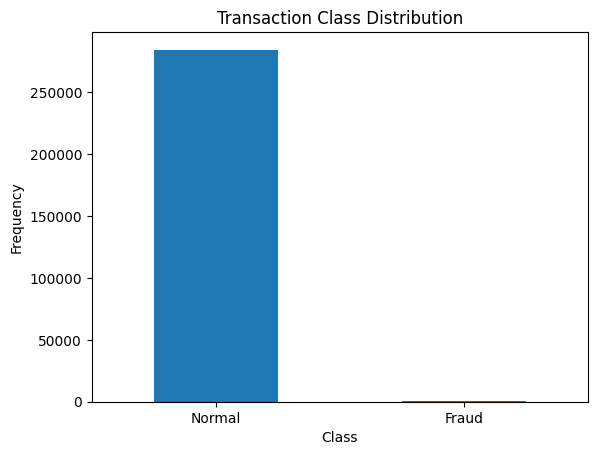

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


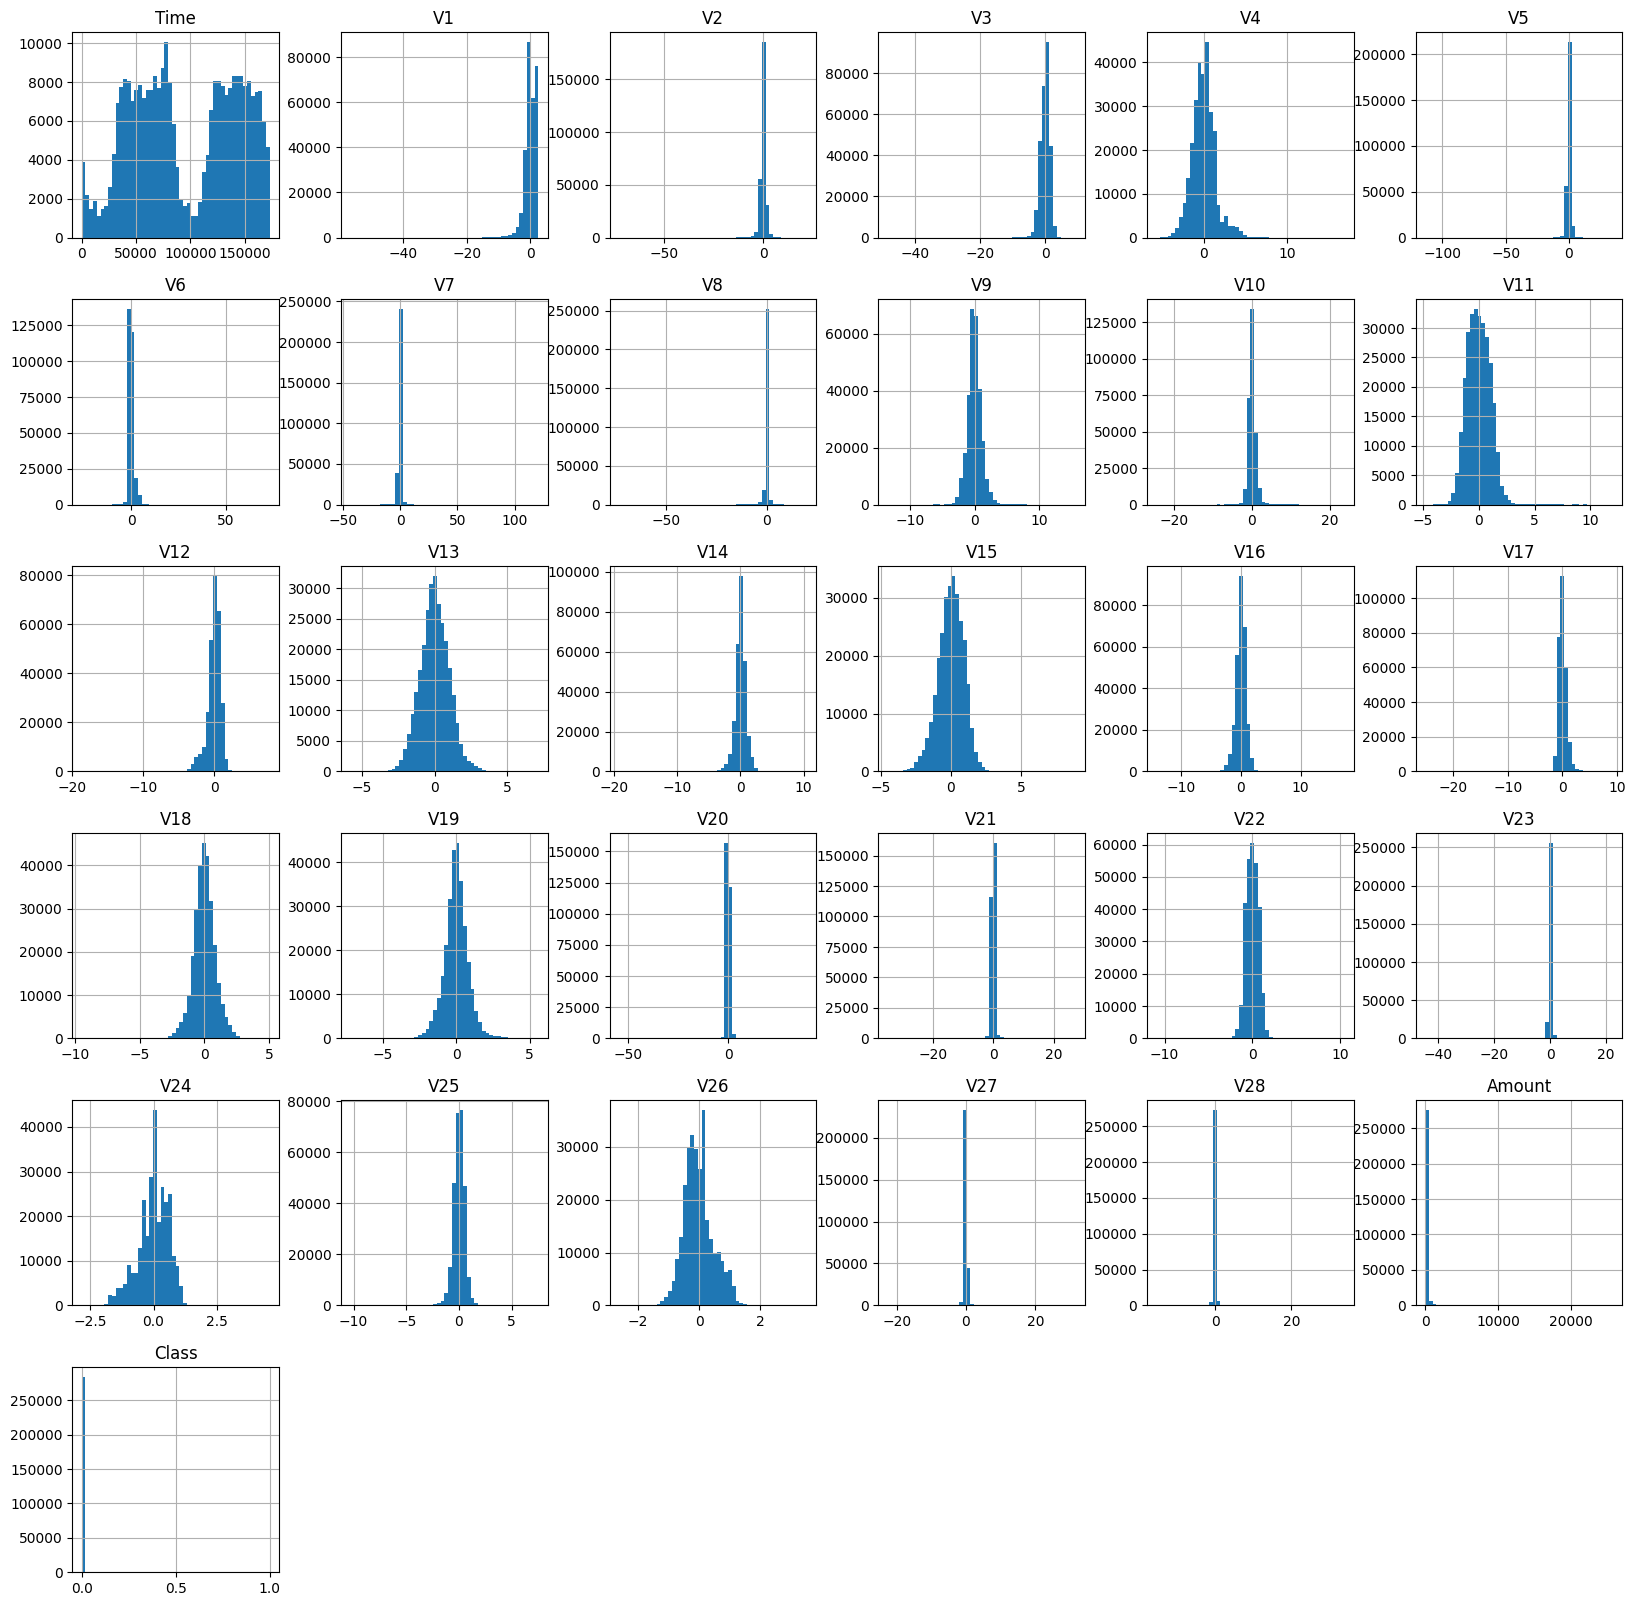

In [ ]:
df.hist(bins=50,figsize=(20,20))
plt.show()

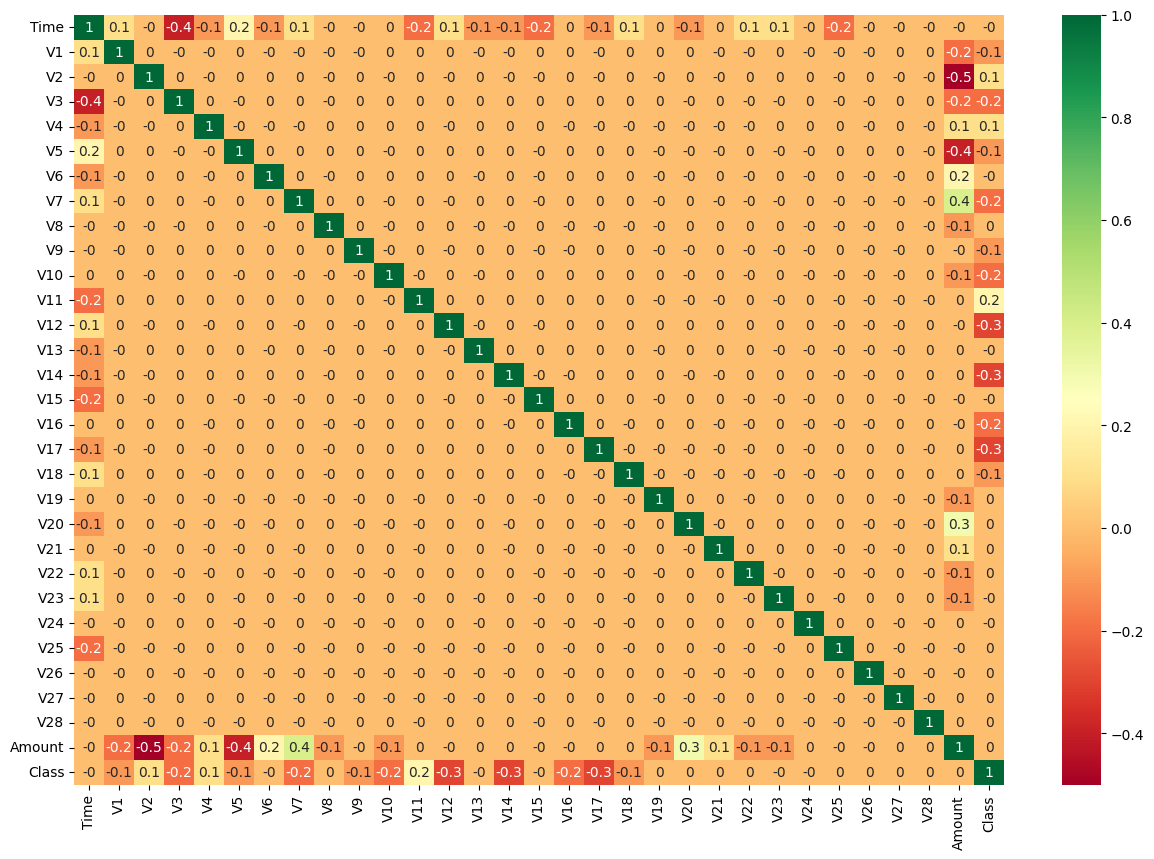

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(method ='pearson'),1),annot=True,cmap='RdYlGn')
plt.show()

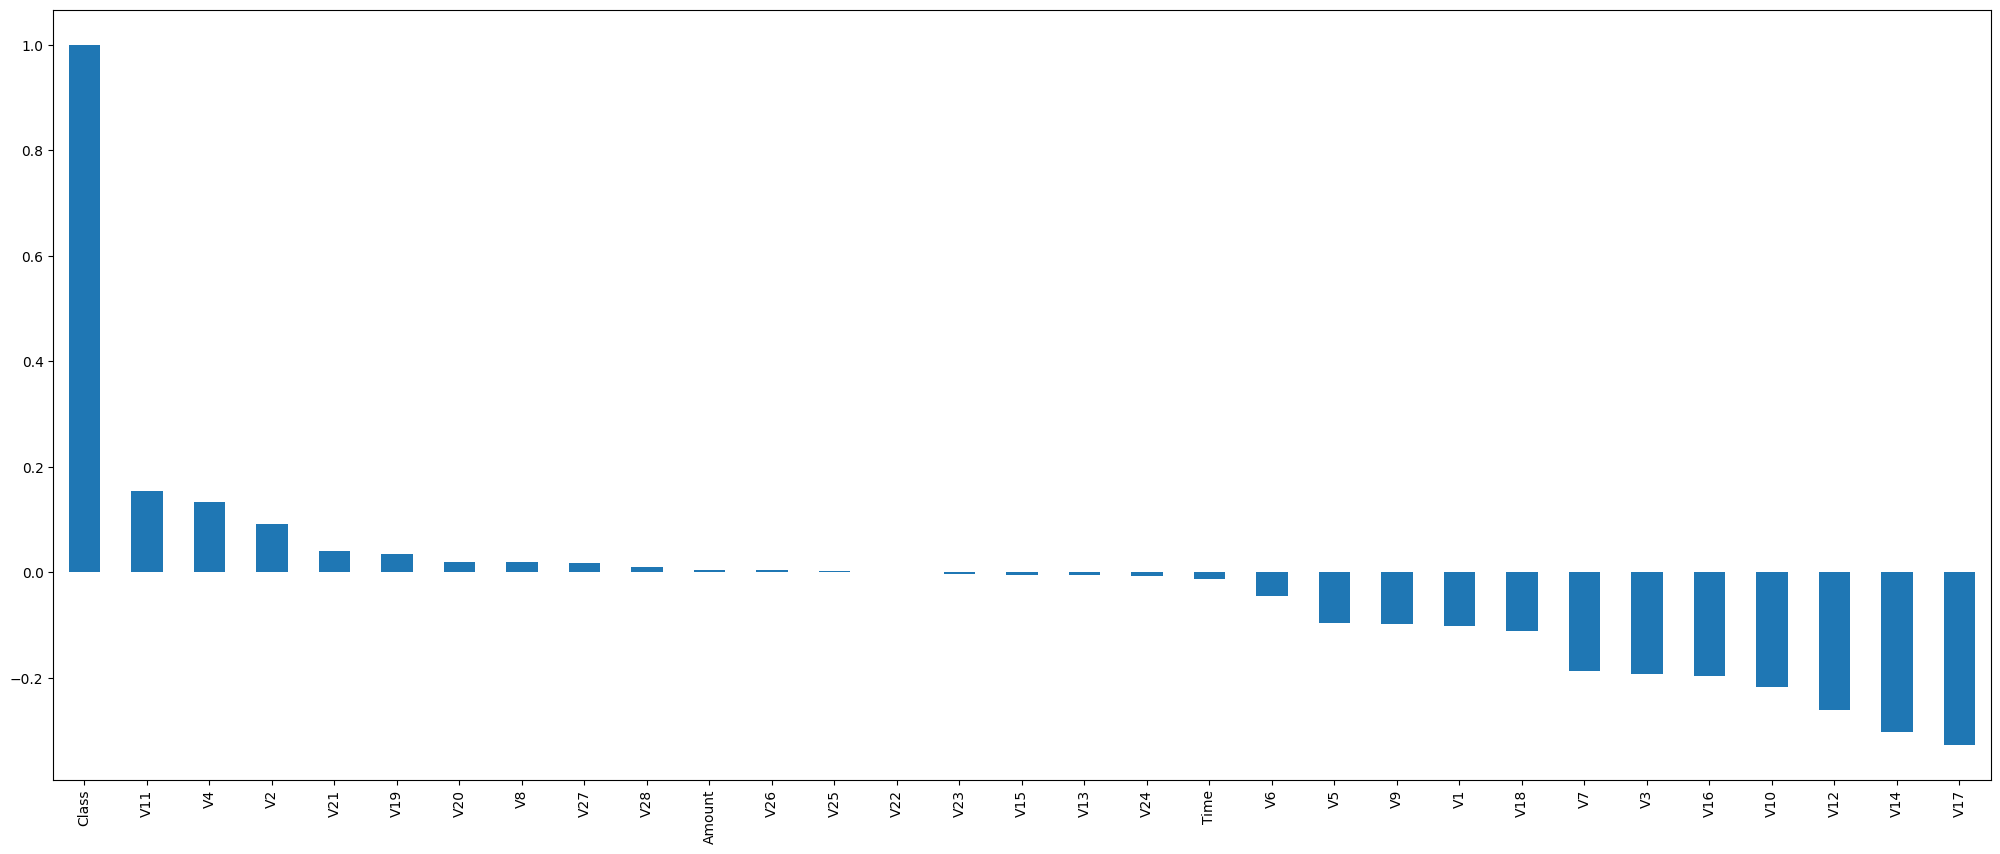

In [ ]:
plt.figure(figsize=(25,10))
df.corr()['Class'].sort_values(ascending = False).plot(kind='bar')
plt.show()

<ipython-input-15-fb6dd68197f6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'].loc[df['Class']==1],bins = int(math.sqrt(len(df['Time'].loc[df['Class']==1]))*2), color='red')
<ipython-input-15-fb6dd68197f6>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'].loc[df['Class']=

Text(0.5, 1.0, 'Time distribution for Non-Fraud Transactions')

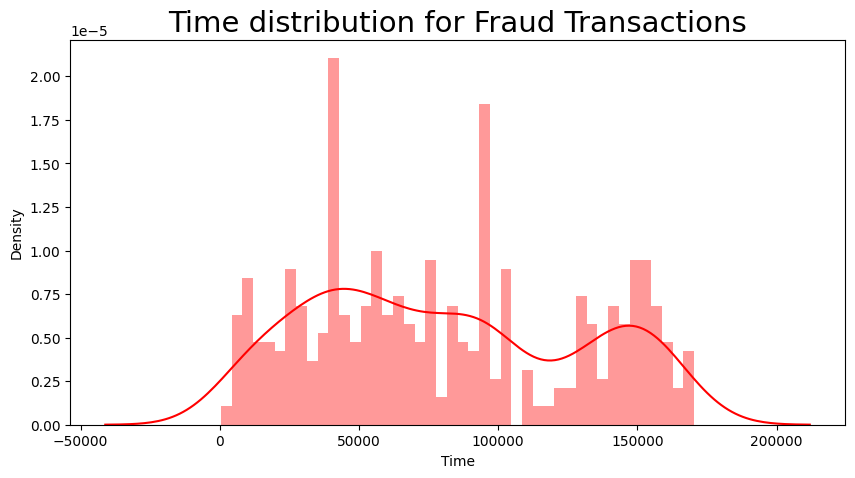

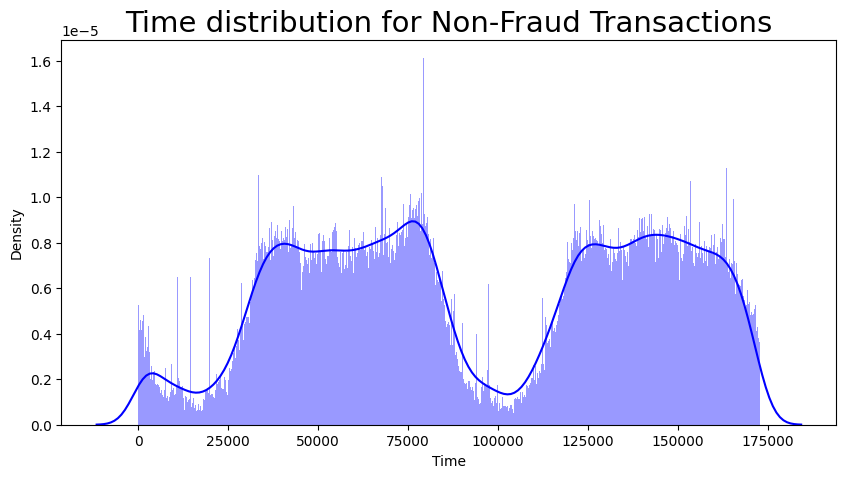

In [ ]:
import math # Import the math module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (10,5))
sns.distplot(df['Time'].loc[df['Class']==1],bins = int(math.sqrt(len(df['Time'].loc[df['Class']==1]))*2), color='red')
plt.title("Time distribution for Fraud Transactions", fontsize=21)

# Checking the frequency of Non-Fraud Transactions with respect to time
plt.figure(figsize = (10,5))
sns.distplot(df['Time'].loc[df['Class']==0],bins = int(math.sqrt(len(df['Time'].loc[df['Class']==0]))*2), color = 'blue')
plt.title("Time distribution for Non-Fraud Transactions", fontsize=21)

<ipython-input-16-e20dfddab03c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'].loc[df['Class']==1],bins = int(math.sqrt(len(df['Amount'].loc[df['Class']==1]))*2), color='blue')
<ipython-input-16-e20dfddab03c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'].loc[df['Cl

Text(0.5, 1.0, 'Amount distribution for both classes')

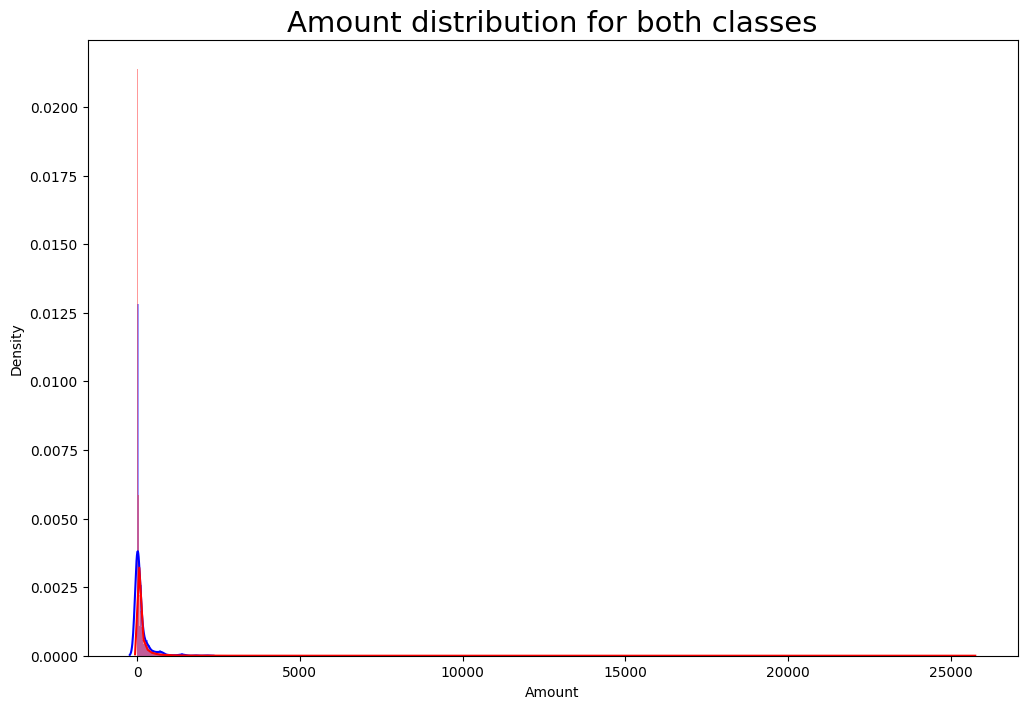

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df['Amount'].loc[df['Class']==1],bins = int(math.sqrt(len(df['Amount'].loc[df['Class']==1]))*2), color='blue')
sns.distplot(df['Amount'].loc[df['Class']==0],bins = int(math.sqrt(len(df['Amount'].loc[df['Class']==0]))*2), color = 'red')
plt.title("Amount distribution for both classes", fontsize=21)

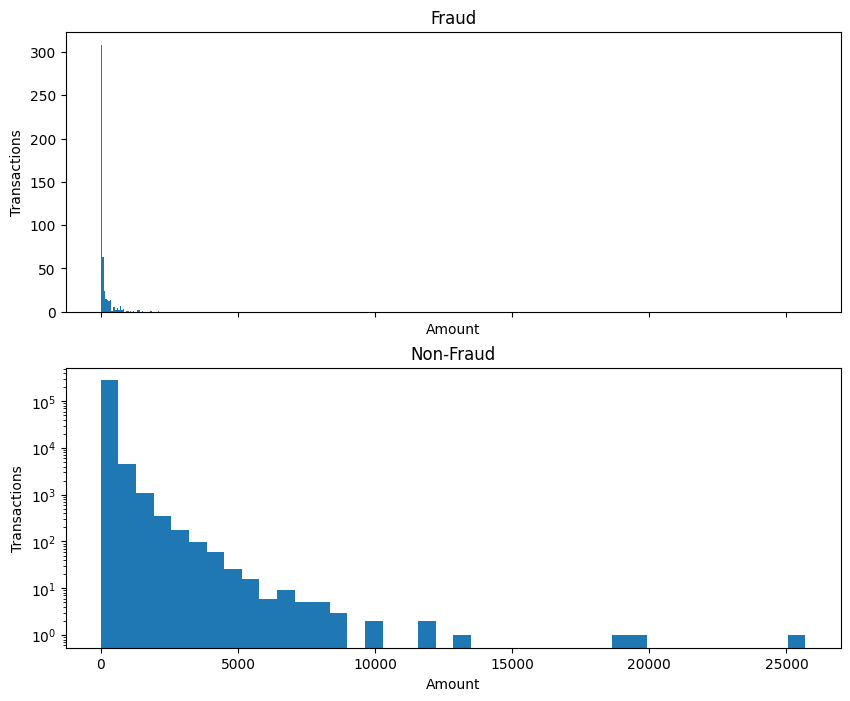

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8))
bins = 40
ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax1.set_ylabel('Transactions')
ax1.set_xlabel('Amount')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Non-Fraud')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Transactions')
plt.yscale('log')
plt.show()

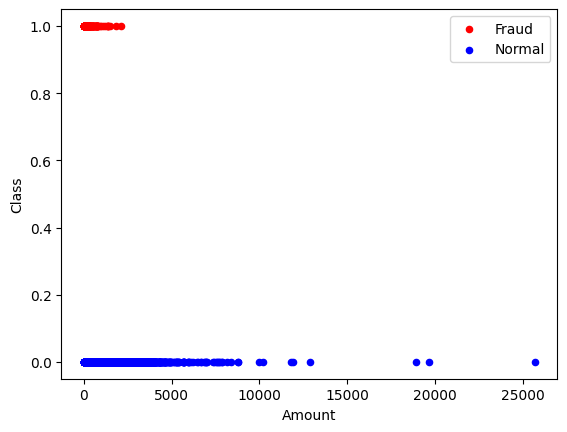

In [ ]:
fraud_df = df.loc[df['Class'] == 1]
Nonfraud_df = df.loc[df['Class'] == 0]
ax = fraud_df.plot.scatter(x='Amount', y='Class', c='Red', label='Fraud')
Nonfraud_df.plot.scatter(x='Amount', y='Class', c='Blue', label='Normal', ax=ax)
plt.show()

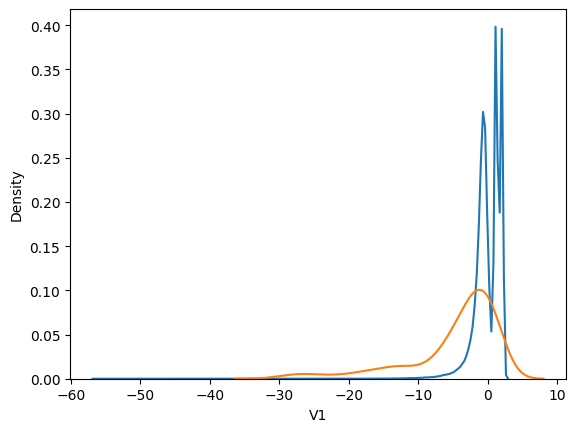

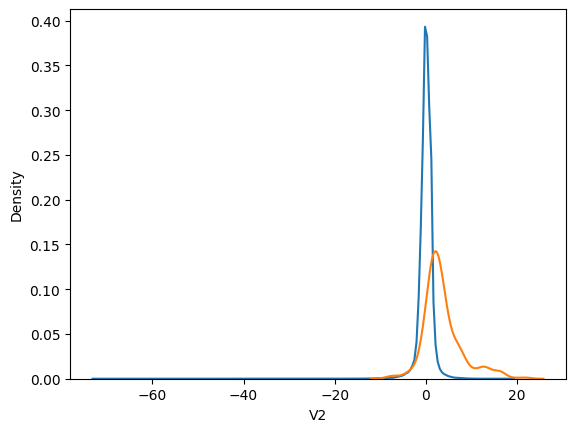

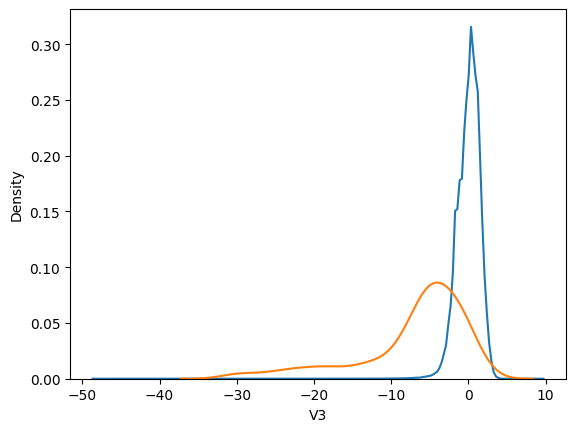

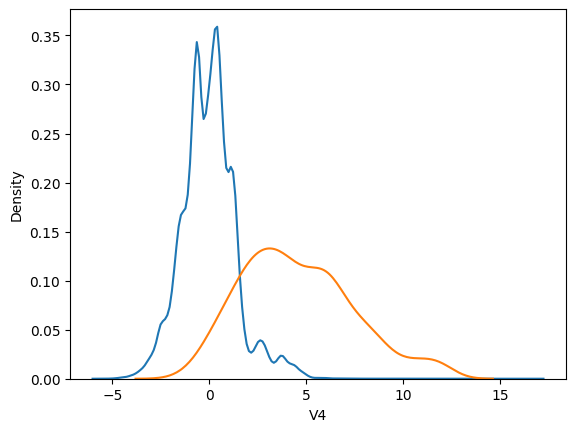

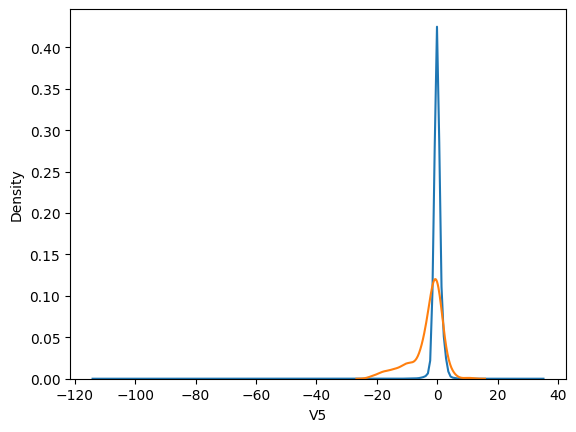

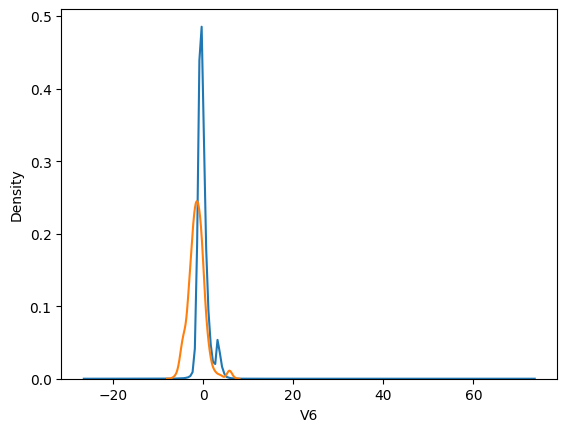

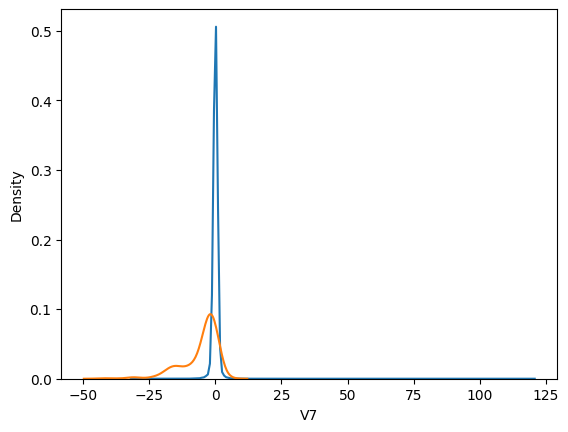

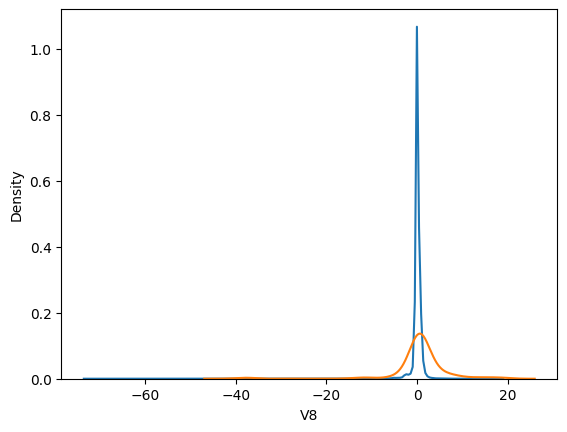

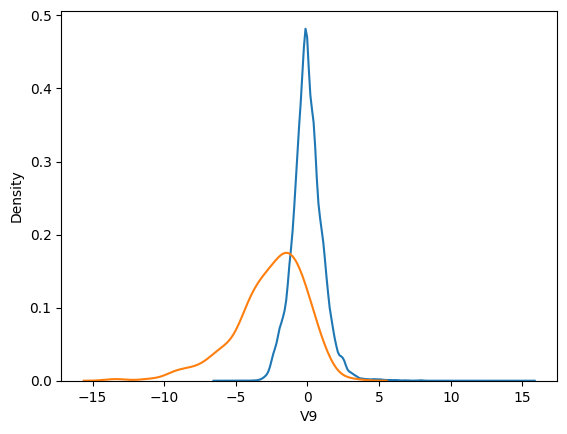

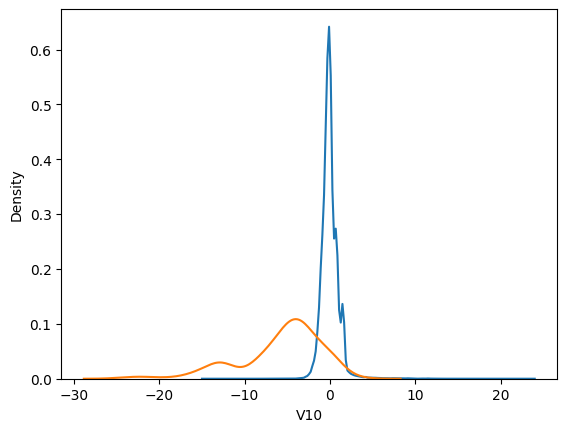

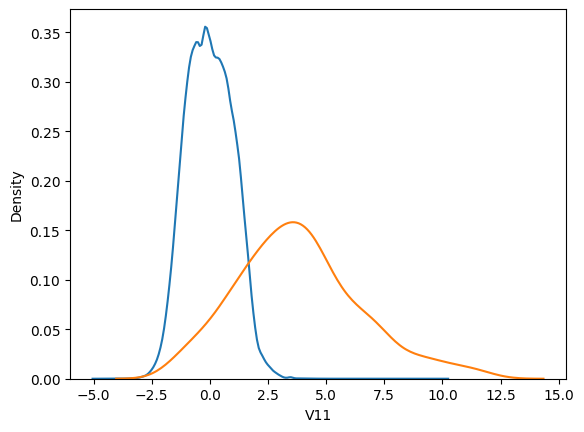

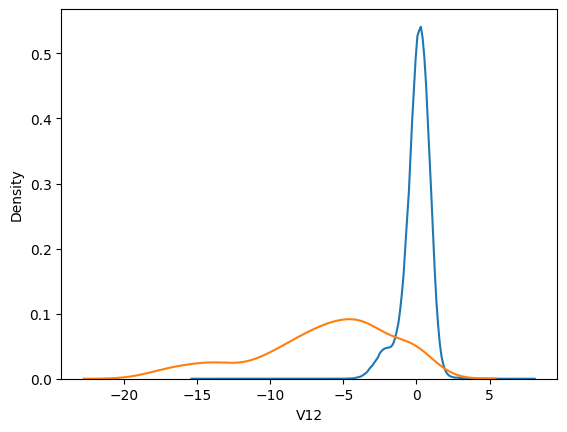

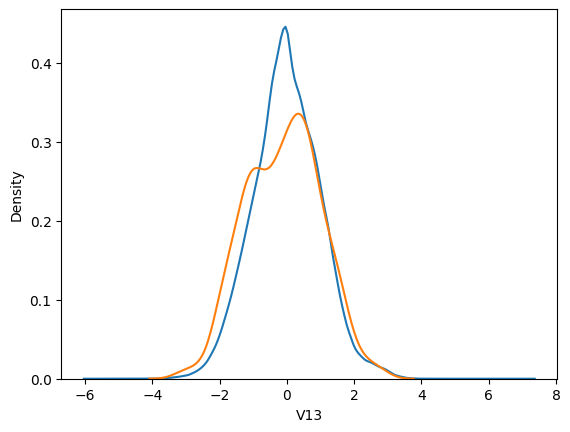

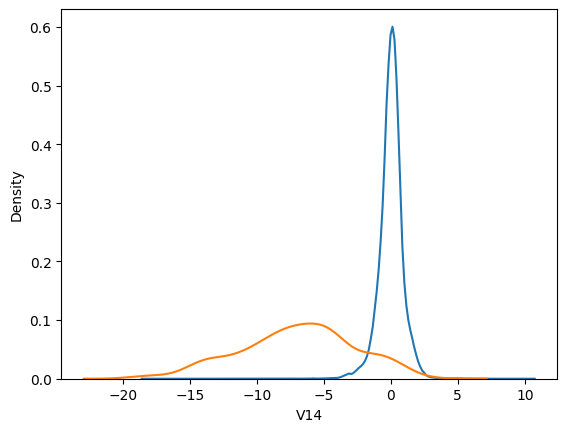

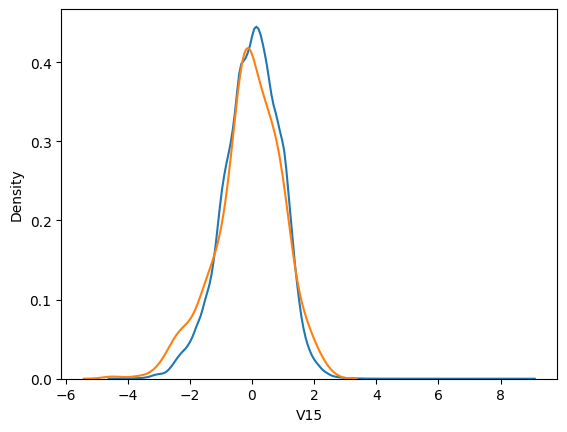

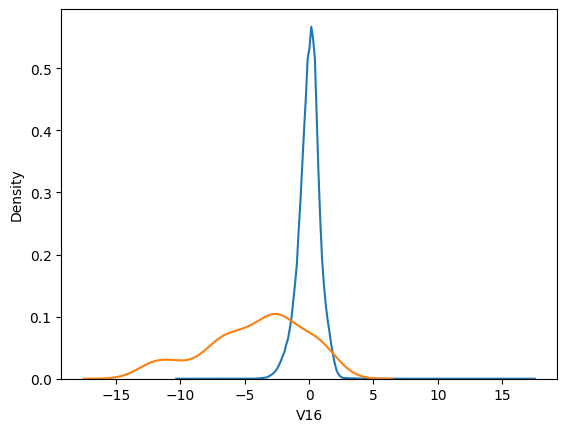

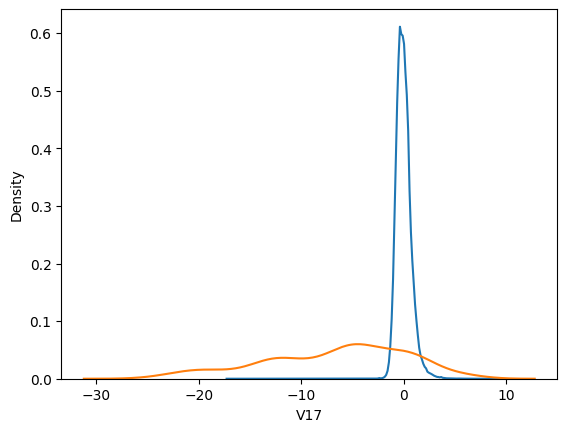

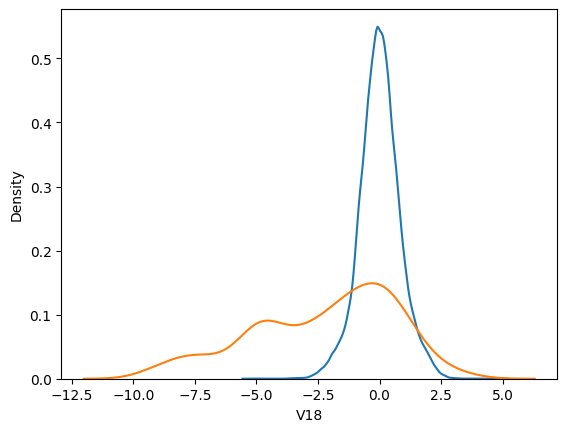

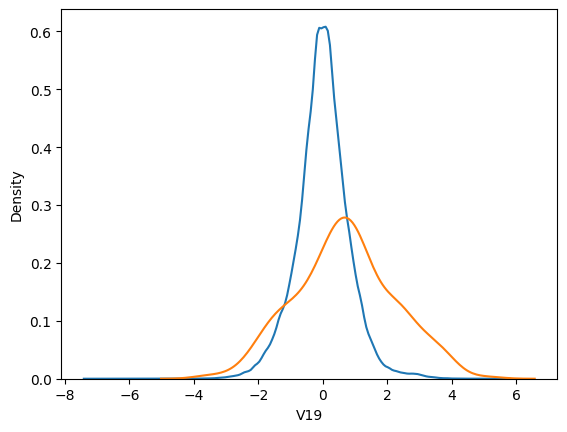

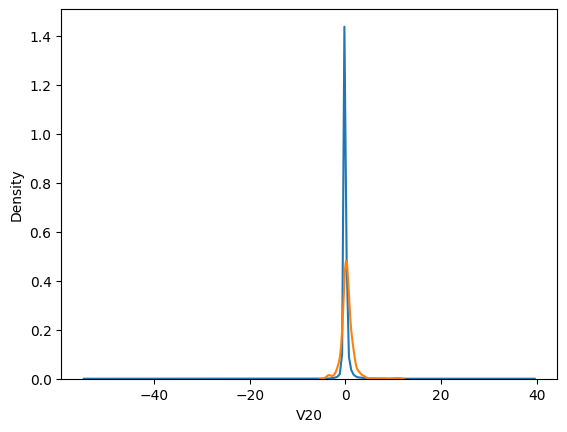

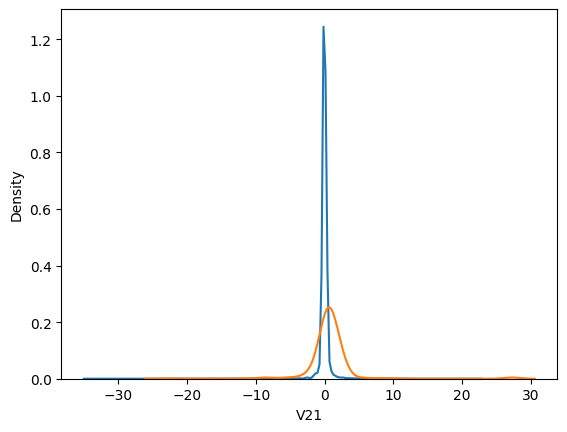

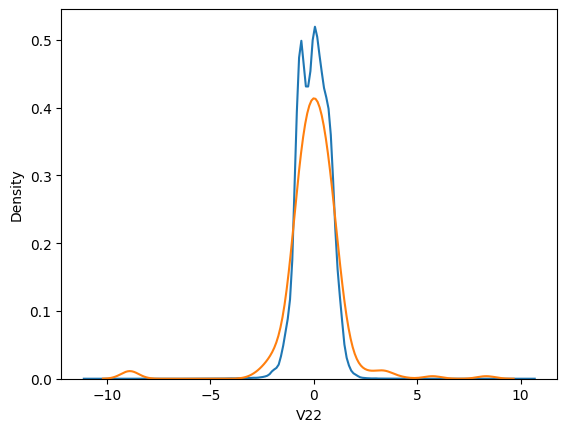

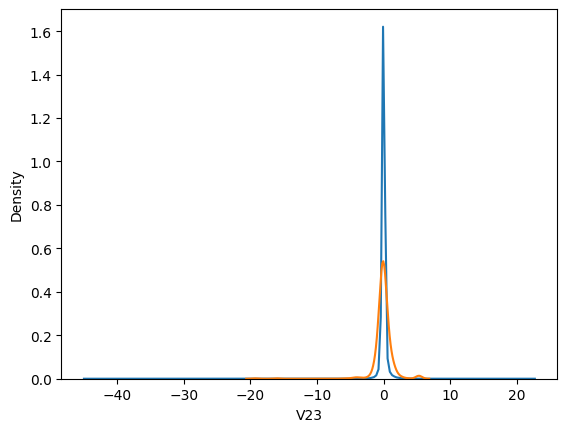

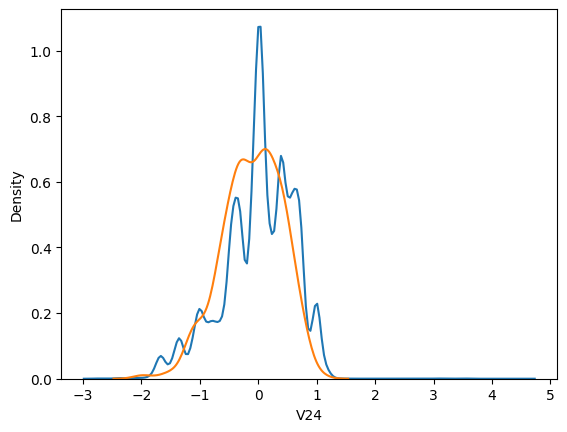

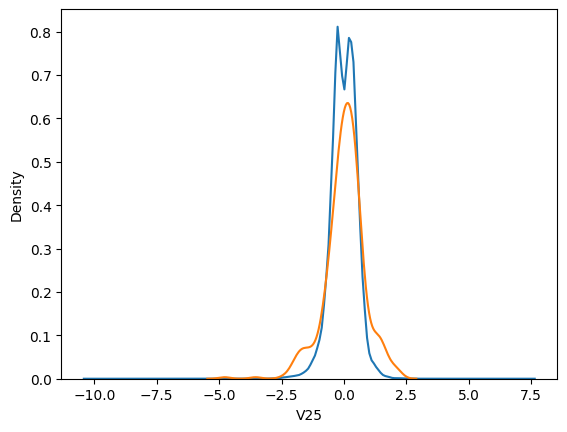

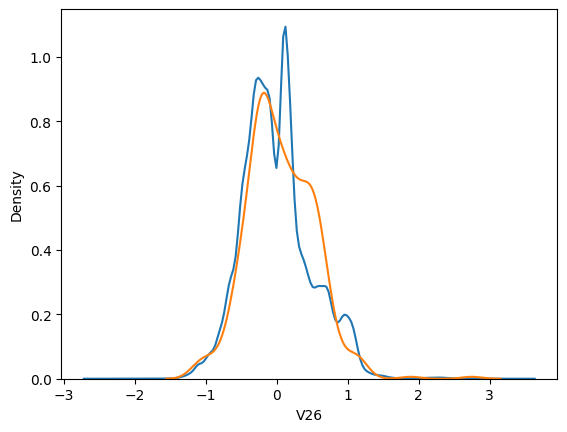

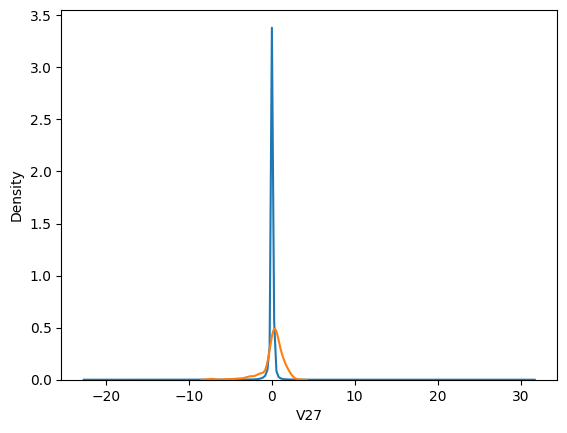

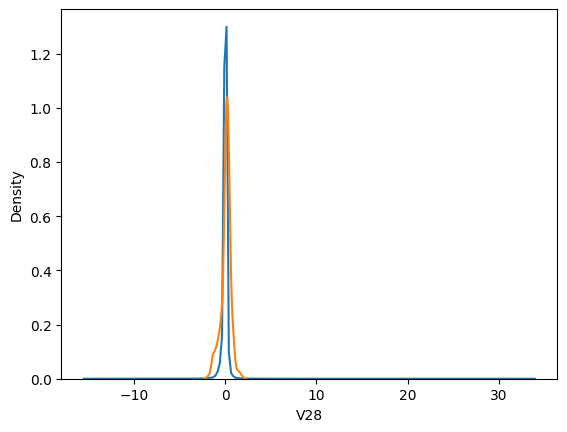

In [ ]:
for j in list(df):
    for i in range(2):
        if(j in ('Time','Amount','Class')):
            continue
        else:
            sns.kdeplot(df[df.Class==i][j])
    plt.show()

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:

import sys

# Function to take user input and predict fraud
def test_fraud_detection(model, scaler):
    print("\nEnter transaction details:")

    try:
        # Example: User enters feature values manually
        input_values = [float(input(f"Enter value for feature {i+1}: ")) for i in range(X_train.shape[1])]

        # Convert input to numpy array and scale
        input_array = np.array(input_values).reshape(1, -1)
        input_scaled = scaler.transform(input_array)

        # Make prediction
        prediction = model.predict(input_scaled)
        result = "Fraudulent Transaction" if prediction[0] == 1 else "Legitimate Transaction"

        print(f"Prediction: {result}\n")
    except ValueError:
        print("Invalid input. Please enter numerical values.")

# Uncomment to test after training
# test_fraud_detection(best_model, scaler)
